In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#make our own datasets which has more features
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
target_names = data.target_names

In [6]:
#determine the shape of your data
print(X.shape , y.shape)

(569, 30) (569,)


In [7]:
#split your data into training and testing part
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X ,y , test_size=0.2 , random_state=42)
#check the shape of your training and testing data
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [8]:
#import your model and fit your model in your train data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [10]:
#predict on your test data
y_pred = knn.predict(X_test)

In [11]:
#test your accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.956140350877193

In [12]:
#standardise your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#imprt your pca model here
from sklearn.decomposition import PCA

In [14]:

pca = PCA(n_components=None)
X_train1  = pca.fit_transform(X_train)

In [15]:
X_test1 = pca.transform(X_test)

In [16]:
X_train1.shape

(455, 30)

In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train1 , y_train)

KNeighborsClassifier()

In [18]:
y_pred1 = knn.predict(X_test1)

In [19]:
accuracy_score(y_test , y_pred1)

0.9473684210526315

In [20]:
#create a 2d visulization
pca = PCA(n_components=2)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
X_train1

array([[ 4.24490333e+00,  9.13142795e+00],
       [ 9.05375518e+00,  4.75309554e-01],
       [-2.27537401e+00,  3.27847097e+00],
       [-2.51045303e+00,  7.43742636e-01],
       [-2.30284792e+00,  2.66515505e+00],
       [ 4.13994739e+00,  2.91476361e+00],
       [ 2.99560854e+00,  4.20447521e+00],
       [-3.21149460e+00, -3.73153521e-01],
       [-2.37592825e+00,  3.33787948e-02],
       [ 3.38983726e+00, -2.36510231e+00],
       [-8.93881293e-01,  9.60683891e-01],
       [ 4.33032435e+00, -4.03761003e+00],
       [ 3.18617027e+00,  1.47231956e+00],
       [-2.63966718e+00,  1.46297451e+00],
       [-3.11866687e+00, -1.43889514e+00],
       [ 5.00491144e+00, -1.16856216e+00],
       [ 9.21099216e+00,  1.75576089e+00],
       [ 5.97157908e+00,  3.48794503e+00],
       [-2.78508674e+00, -2.43552252e+00],
       [-3.28557710e+00, -4.26562359e-02],
       [-2.05551632e+00, -2.42605467e+00],
       [ 4.78576830e+00,  3.19275729e+00],
       [-4.50204054e-01,  1.30156054e-01],
       [-2.

In [21]:
#create a 2D visulization 
import plotly.express as px 
import plotly.graph_objects as go 
import plotly.io as pio
pio.renderers.default = 'browser'



# Optional: Convert target values to labels
# Optional: Convert target values to friendly labels
y_train_labels = ['⚠️ Harmful Tumor' if label == 0 else '✅ Safe Tumor' for label in y_train]

# Update color mapping
color_discrete_map = {'⚠️ Harmful Tumor': 'darkred', '✅ Safe Tumor': 'lightgreen'}


# Create a DataFrame for Plotly
import pandas as pd
df_pca = pd.DataFrame({
    'PC1': X_train1[:, 0],
    'PC2': X_train1[:, 1],
    'Diagnosis': y_train_labels
})

# Plot
fig = px.scatter(
    df_pca, 
    x='PC1', 
    y='PC2', 
    color='Diagnosis',
    title='🧬 PCA Projection of Breast Cancer Training Data',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
    opacity=1.0,
    color_discrete_map={'⚠️ Harmful Tumor': 'darkred', '✅ Safe Tumor': 'lightgreen'},
    template='plotly_dark',  # You can also try 'ggplot2', 'simple_white', 'seaborn'
    width=1900,
    height=900
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='white')))
fig.update_layout(
    title_font_size=22,
    title_font_color='lightblue',
    legend_title_text='Cancer Type',
    legend=dict(x=0.85, y=0.95),
    plot_bgcolor='black',
    paper_bgcolor='black'
)

fig.show()


In [22]:
#create a 3d visulization
pca = PCA(n_components=3)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
X_train1

array([[ 4.24490333,  9.13142795,  1.5042624 ],
       [ 9.05375518,  0.47530955, -3.1982151 ],
       [-2.27537401,  3.27847097,  2.81636955],
       ...,
       [-4.50065362, -3.06780804, -0.0310455 ],
       [ 0.72828496,  0.42628657, -2.73093201],
       [-3.40392527, -1.33038767, -0.14920956]])

In [23]:
import plotly.express as px
import plotly.io as pio
import pandas as pd

pio.renderers.default = 'browser'

df_pca_3d = pd.DataFrame({
    'PC1': X_train1[:, 0],
    'PC2': X_train1[:, 1],
    'PC3': X_train1[:, 2],
    'Diagnosis': y_train_labels
})

# Plot 3D PCA
fig_3d = px.scatter_3d(
    df_pca_3d,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Diagnosis',
    color_discrete_map={
        '⚠️ Harmful Tumor': 'darkorange',
        '✅ Safe Tumor': 'lightgreen'
    },
    title='🧬 3D PCA Projection of Breast Cancer Data (Light Theme)',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    opacity=1.0
)

fig_3d.update_traces(marker=dict(size=9))
fig_3d.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3',
        bgcolor='white'
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    legend_title_text='Cancer Type',
    title_font_size=20
)

fig_3d.show()


In [24]:
#eigen values
pca.explained_variance_

array([13.07958081,  5.86288753,  2.94091922])

In [25]:
pca.components_

array([[ 0.21601485,  0.1016996 ,  0.22518147,  0.21853483,  0.14898157,
         0.24083587,  0.25949969,  0.26332425,  0.14621735,  0.06574066,
         0.20391855,  0.0234544 ,  0.20902392,  0.19950297,  0.02157185,
         0.16576253,  0.14905441,  0.18242981,  0.04766427,  0.09875333,
         0.22639195,  0.10512288,  0.2361263 ,  0.22421579,  0.13234785,
         0.21129704,  0.22955601,  0.25291716,  0.1272409 ,  0.13234079],
       [-0.24004016, -0.05126301, -0.22216079, -0.23648928,  0.16931634,
         0.1501344 ,  0.06403735, -0.03963956,  0.18327955,  0.3614473 ,
        -0.10885925,  0.09695105, -0.09160367, -0.15364598,  0.19446562,
         0.23790703,  0.20784177,  0.1430481 ,  0.17450928,  0.28110189,
        -0.22454754, -0.03899357, -0.20358556, -0.22266931,  0.15618182,
         0.14403463,  0.10278108, -0.00567144,  0.13010012,  0.27735365],
       [-0.00142306,  0.0252676 , -0.00258533,  0.03627333, -0.12201628,
        -0.07195045,  0.00644833, -0.02852076, -0

In [26]:
pca.explained_variance_ratio_

array([0.43502782, 0.19500007, 0.09781519])

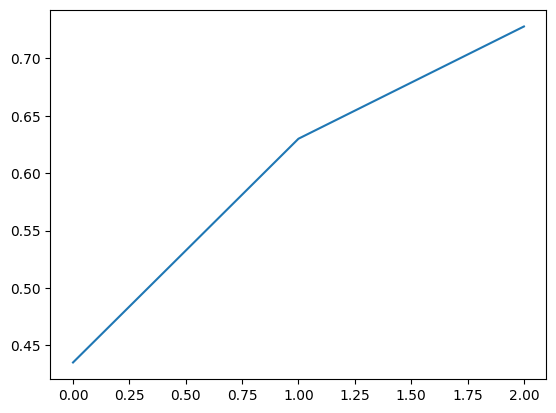

In [27]:
#these all are for 3D 
np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [28]:
np.cumsum(pca.explained_variance_ratio_)
#these are our eigen vectors    

array([0.43502782, 0.63002788, 0.72784307])